In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# 读取文件

In [30]:
# 需要分析的第几帧
frame_num = 0
# 文件位置
file_path = r'C:\Users\zhang\Desktop\md\2024corning\july\tension\origin-y\tension-process_out.xyz'
creat_new_frame = 0
# 需要分析的元素，多种元素的话放在同一个列表里
ana_element = ['Al']
# 是否添加颜色轴
have_colorbar = 1

In [31]:
# 读取文件
def get_data(path,frame_num):
    with open(path) as f:
        str_data = f.read()
    data = str_data.split()
    ###选帧#########
    #此处写个程序选帧
    atoms_num = int(data[0])
    frame_len = atoms_num*4+2
    data_len =len(data)
    max_frame = data_len // frame_len
    
    temp = []
    temp = data[frame_len*frame_num:frame_len*(frame_num+1)]
    #暂时先自行处理了表头
    temp = temp[2:]
    frame_list = []
    for i in range(atoms_num):
        frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])
    
    return frame_list

In [32]:
# 此处从函数中读取数据
data = get_data(file_path,frame_num)

In [33]:
# 存储原子的列表 找到我们需要分析的元素 
atom_list = []
# 循环读取
for i in data:
    len_element = len(ana_element)
    for ii in range(len_element):
        if( i[0] == ana_element[ii]):
            atom_list.append([i[1],i[2],i[3]])
            break
atom_list = np.array(atom_list)
print(atom_list[0])

[29.115099 55.426514 10.91409 ]


In [34]:
# 因为xyz数据没有边界值 我们就设最大的xyz为边界值，我做过对比，基本上没有太大的误差 
a,b,c = 0,0,0
for i in atom_list:
    if(i[0]>a):
        a=i[0]
    if(i[1]>b):
        b=i[1]
    if(i[2]>c):
        c=i[2]
print(a,b,c)

82.324299 73.535614 11.17669


# 画图程序

In [35]:
# 现在有了程序 然后分析把数据切割成xyz三个列表放入函数中

In [36]:
# 首先得到最大的xyz值
x_max = 0
y_max = 0
z_max = 0
for i in data:
    if(x_max<i[1]):
        x_max=i[1]
    if(y_max<i[2]):
        y_max=i[2]
    if(z_max<i[3]):
        z_max=i[3]

# 切多少份 就是每个区域的精度大小
num_split = 20

In [37]:
x_list = np.linspace(0,x_max,num_split)
y_list = np.linspace(0,y_max,num_split)
# z应该是二维的 表示每个位置的强度
z_list = np.zeros((num_split, num_split))

In [38]:
len(z_list)

20

# 然后为z列表赋值

In [39]:
# 写个函数 给出一个xyz，返回其在z中的xy位置
def get_xy(x,y,res):
    xn = x//res
    yn = y//res
    return (xn-1,yn-1)

In [40]:
# 遍历f原子的id，为其所在的组别分组
for i in atom_list:
    (m,n) = get_xy(i[0],i[1],x_max/num_split)
    z_list[int(m),int(n)]+=1

In [41]:
len(z_list)

20

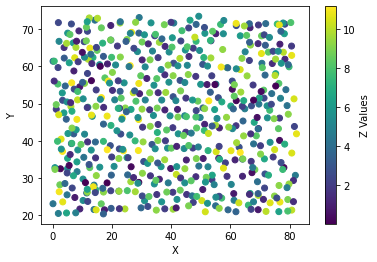

In [42]:
import matplotlib.pyplot as plt

x_list = atom_list[:,0]
y_list = atom_list[:,1]
z_list = atom_list[:,2]
# 创建一个二维散点图
plt.scatter(x_list, y_list, c=z_list, cmap='viridis', marker='o')

# 设置颜色条
plt.colorbar(label='Z Values')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.show()


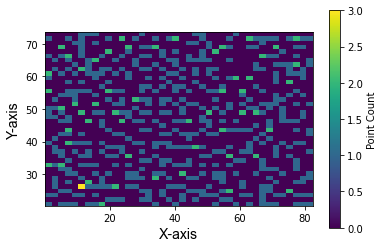

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties


# 设置x和y的bins数量
bins_x = 40
bins_y = 40

# 创建一个二维直方图
heatmap, xedges, yedges = np.histogram2d(x_list, y_list, bins=[bins_x, bins_y])

# 在xy平面上画出二维直方图
plt.imshow(heatmap.T, extent=[min(x_list), max(x_list), min(y_list), max(y_list)], origin='lower', cmap='viridis')
plt.colorbar(label='Point Count')

# 设置坐标轴标签，分别使用中文和英文
font_prop_chinese = FontProperties(fname=r'C:\Windows\Fonts\SimHei.ttf', size=14)
font_prop_english = FontProperties(fname=r'C:\Windows\Fonts\Arial.ttf', size=14)

plt.xlabel('X-axis', fontproperties=font_prop_english)
plt.ylabel('Y-axis', fontproperties=font_prop_english)

# 显示图形
plt.show()
